In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.ticker as ticker
import matplotlib.cm

import wcs

In [3]:
distances = wcs.all_pairwise_color_distances()

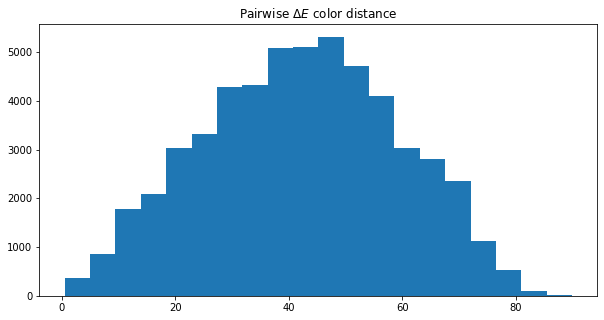

In [24]:
fig, ax = plt.subplots()
positive = distances > 0
ax.hist(distances[positive].flatten(), bins = 20)
title = "Pairwise $\Delta E$ color distance"
ax.set_title(title)
fig.set_size_inches((10, 5))

In [7]:
distances_df = pd.DataFrame(distances[positive])
distances_df.describe()

,0
count,54285.000000
mean,42.157650
std,17.073256
min,0.491879
25%,29.663993
50%,42.528510
75%,54.591058
max,89.866255


In [3]:
# find the minimum and maximum distance between adjacent chips
border_distances = wcs.build_border_distances(distances)
        
for c in border_distances:
    dists = border_distances[c]
    dists = [(wcs.matrix_to_wcsgrid[x[0]], x[1]) for x in dists]
    print(f"chip {wcs.matrix_to_wcsgrid[c]} border dists: {dists}")

chip ('A', 0) border dists: [(('J', 0), 75.21771713746259), (('B', 0), 2.9824090405248724)]
chip ('B', 0) border dists: [(('A', 0), 2.9824090405248724), (('B', 40), 5.063718204753847), (('B', 1), 5.307056928548529), (('C', 0), 6.32175382548834)]
chip ('B', 1) border dists: [(('B', 0), 5.307056928548529), (('B', 2), 0.7449791596051845), (('C', 1), 13.070060709732497)]
chip ('B', 2) border dists: [(('B', 1), 0.7449791596051845), (('B', 3), 0.8749844531907206), (('C', 2), 13.209025497523136)]
chip ('B', 3) border dists: [(('B', 2), 0.8749844531907206), (('B', 4), 0.9079844349093213), (('C', 3), 13.498584970427576)]
chip ('B', 4) border dists: [(('B', 3), 0.9079844349093213), (('B', 5), 1.6000051446233512), (('C', 4), 13.80190569877863)]
chip ('B', 5) border dists: [(('B', 4), 1.6000051446233512), (('B', 6), 2.1583439049917525), (('C', 5), 13.544332417754031)]
chip ('B', 6) border dists: [(('B', 5), 2.1583439049917525), (('B', 7), 2.240880545241806), (('C', 6), 13.210248668113183)]
chip ('

In [13]:
def plot_grid_with_neighbors(adjacency_dict, threshold):
    """adjacency_dict is a dict with keys being matrix positions and values being an adjacency List of neighbors
    adjacency_dict should not have more than 7 keys (because the color map is hardcoded)"""
    # plot the wcs grid with the mle estimate
    fig, ax = plt.subplots()
    num_cols = 41
    num_rows = len('ABCDEFGHIJ')
    X, Y = np.meshgrid(np.arange(num_cols), np.arange(num_rows))
    Z = np.zeros((num_rows, num_cols), dtype=int)
   
    cmap_list = [ 'xkcd:white'
                 , 'xkcd:dark red', 'xkcd:light red'
                 , 'xkcd:dark blue', 'xkcd:light blue'
                 , 'xkcd:dark yellow', 'xkcd:light yellow'
                 , 'xkcd:dark green', 'xkcd:light green'
                 , 'xkcd:dark purple', 'xkcd:light purple'
                 , 'xkcd:dark pink', 'xkcd:light pink'
                 , 'xkcd:dark aqua', 'xkcd:light aqua'
                ]

    if len(adjacency_dict) > len(cmap_list) / 2:
        print("ERROR: too many chips, cmap does not have enough colors")
        return
    
    color = 0
    for chip in adjacency_dict:
        # use the next color for chip
        color = color + 1
        neighbors = adjacency_dict[chip]
        row, col = wcs.chipnum_to_matrix[chip]
        # print(f"row {row}, col {col} got color {color}")
        Z[row, col] = color
        
        # use a lighter color for the neighbors
        color += 1
        # if neighbors is empty, remove the color from cmap_list
        if len(neighbors) == 0:
            del cmap_list[color]
            color -= 1
            # print(f"Neighbors empty, now color is {color}")
            
        for nhbr in neighbors:
            row, col = wcs.chipnum_to_matrix[nhbr]
            # print(f"row {row}, col {col} got color {color}")
            Z[row, col] = color
            
        print()
    
    cmap = ListedColormap(cmap_list[:color+1])
    mesh = ax.pcolormesh(X, Y, Z, shading='auto', edgecolors='black', cmap=cmap)
    # pcolormesh needs to have data flipped
    ax.invert_yaxis()

    # setup grid labels and title
    ax.set_title('Selected colors and their neighbors for $\Delta E 2000$ threshold ${}$'.format(threshold))
    ax.set_xticks(np.arange(num_cols))
    ax.set_yticks(np.arange(num_rows))
    ax.set_xticklabels([str(i) for i in range(41)])
    ax.set_yticklabels([c for c in 'ABCDEFGHIJ'])
    ax.tick_params(top=True, bottom=False, labeltop=True, labelbottom=False)

    fig.set_size_inches((36, 8))
    # plt.show()
    plt.savefig('output/color_neighbor_graph_thresh_{}.png'.format(threshold))

In [59]:
thresh = 4
adjacencies = wcs.build_adjacency_dict(distances, thresh)

i = 24: c1 = 27, c2 = 230
i = 25: c1 = 27, c2 = 290
i = 26: c1 = 27, c2 = 302
i = 27: c1 = 27, c2 = 324


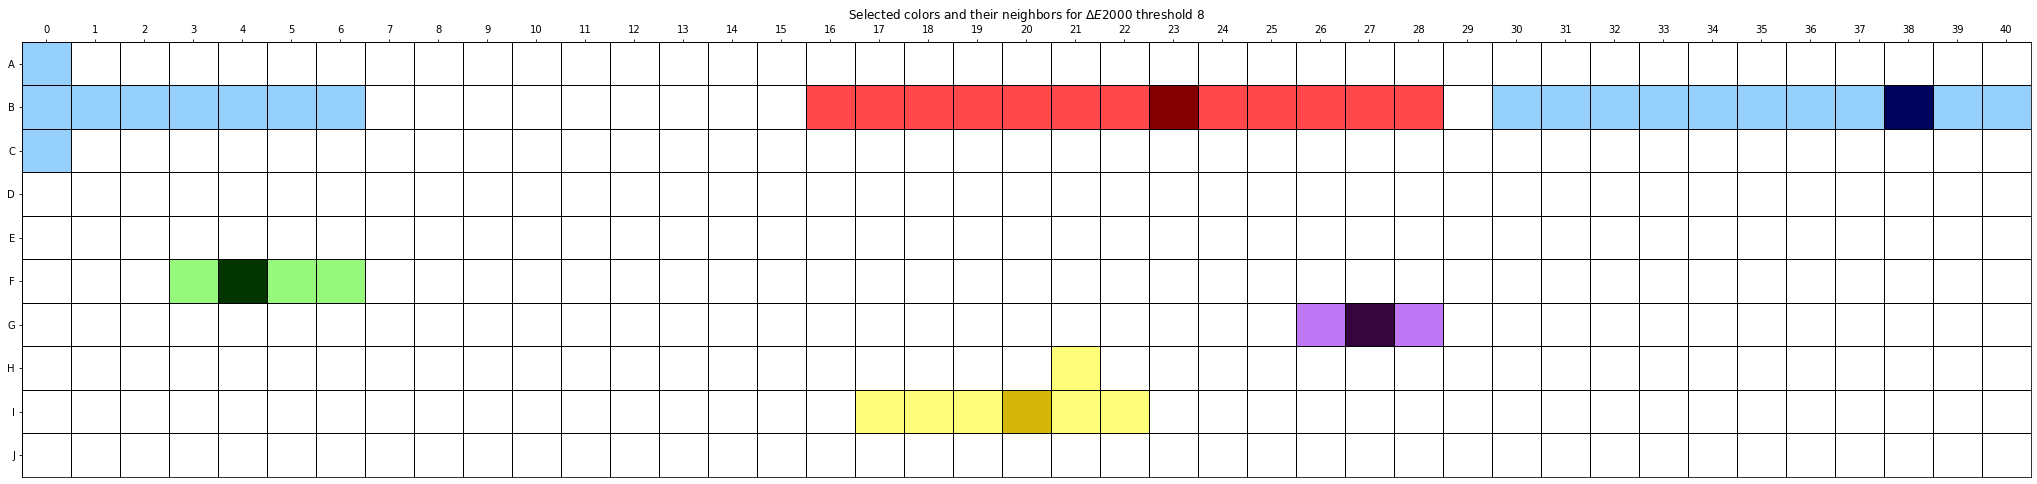

In [14]:
grid_pts = [('B', 23), ('B', 38), ('I', 20), ('F', 4), ('G', 27)]
chips = [wcs.wcsgrid_to_chipnum[g] for g in grid_pts]
# take a subset of the adjacencies dict
adjs = {}
for c in chips:
    adjs[c] = adjacencies[c].copy()
    
plot_grid_with_neighbors(adjs, thresh)

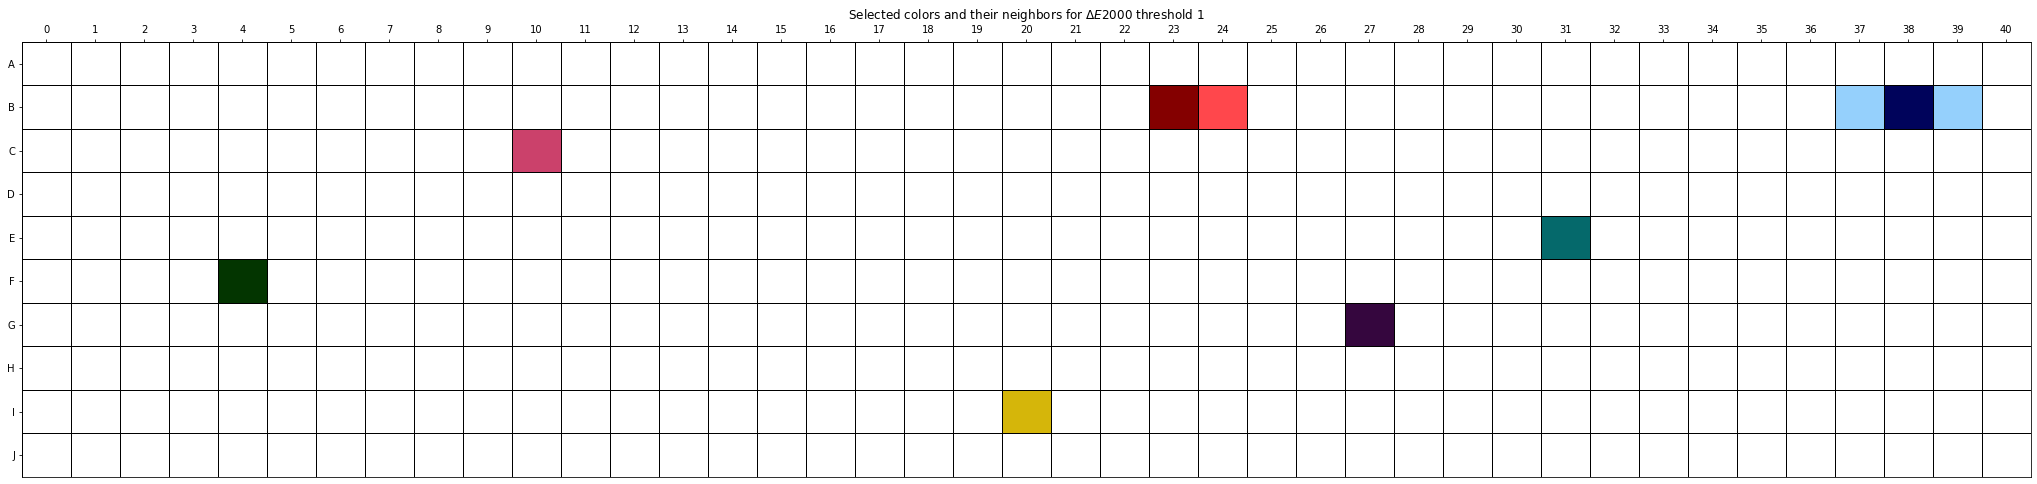

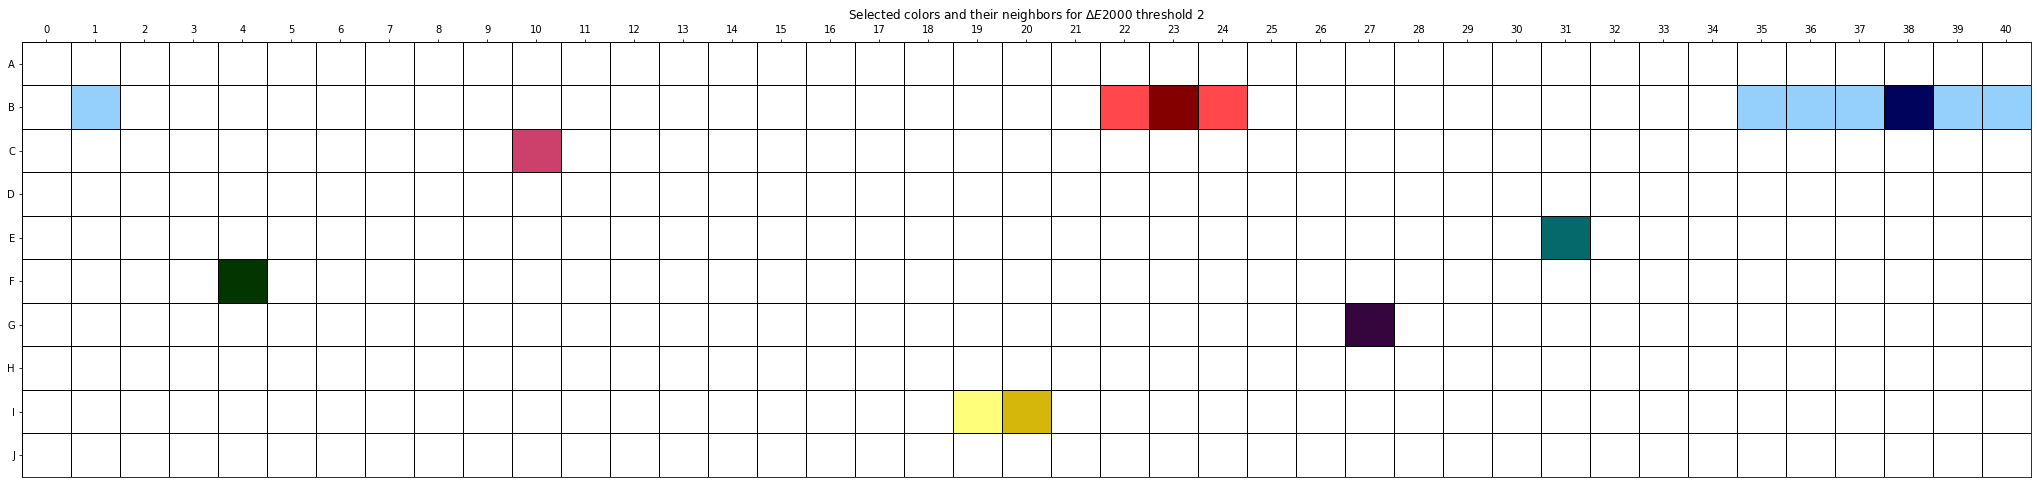

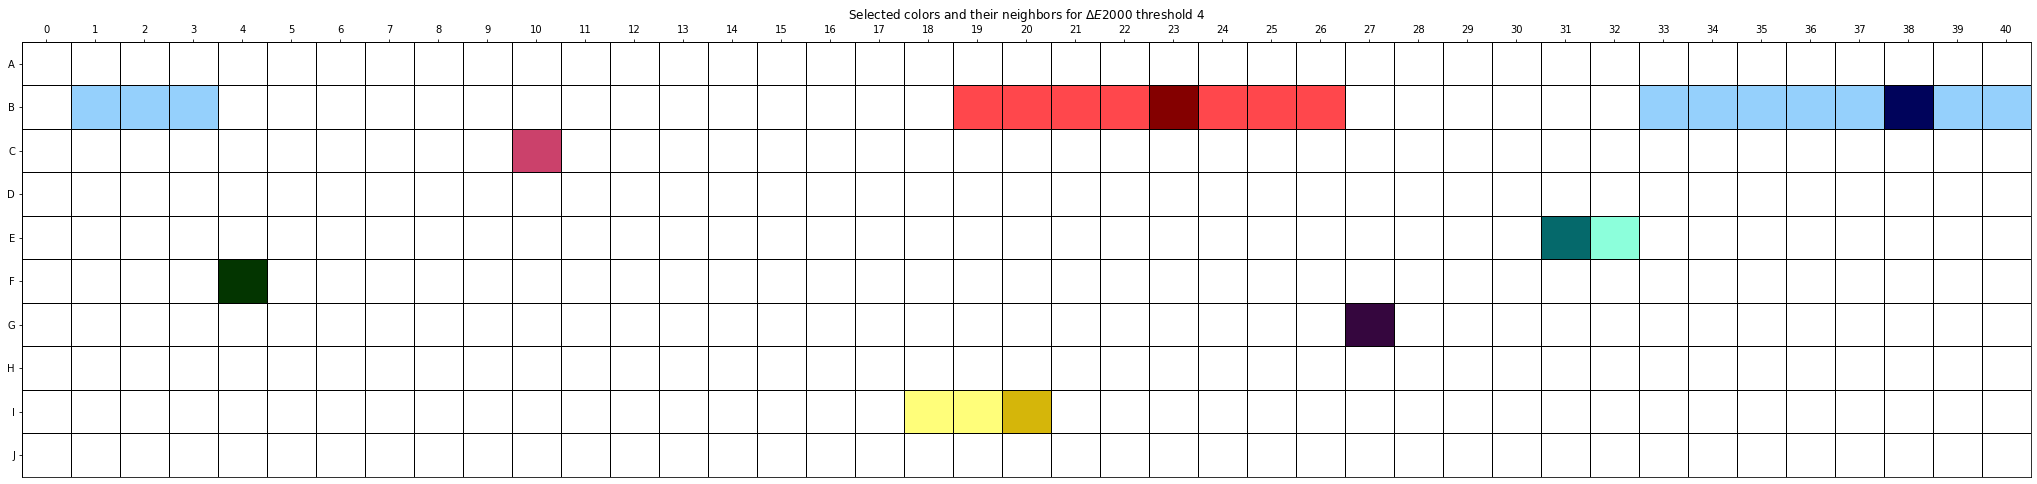

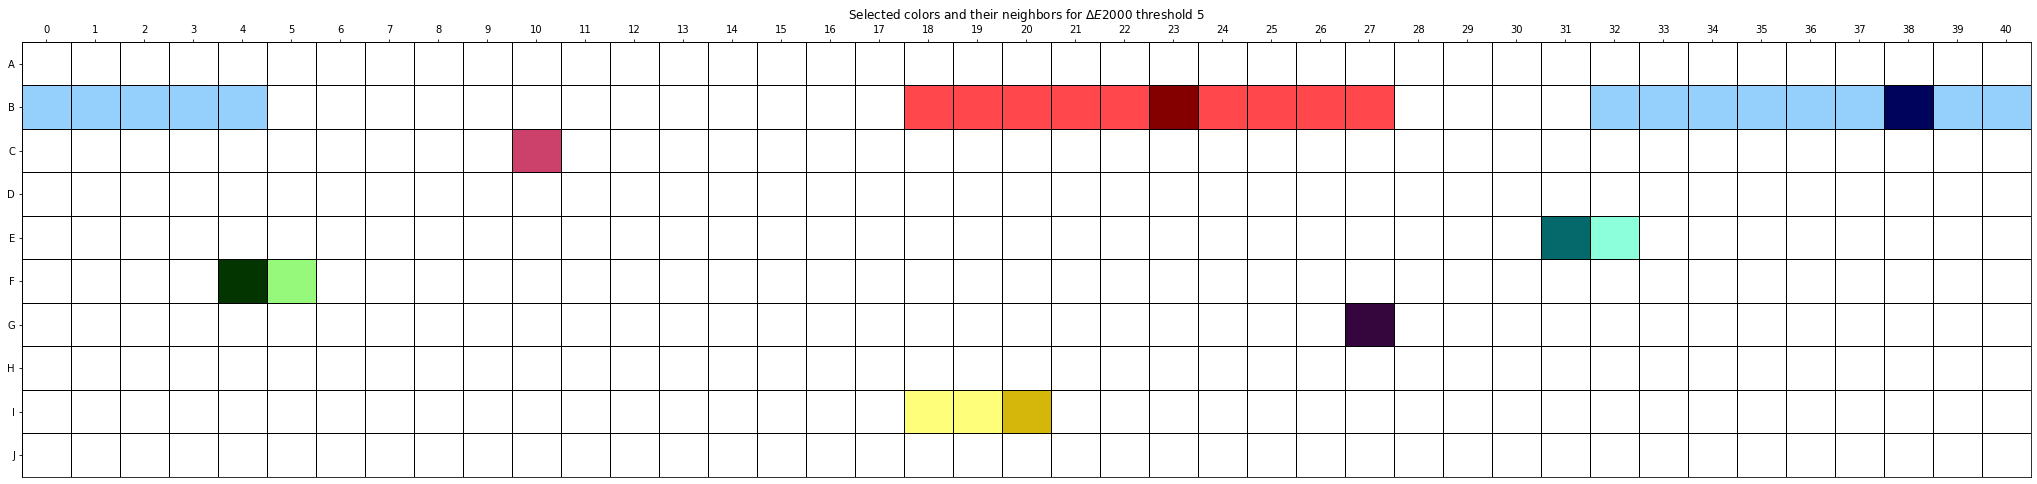

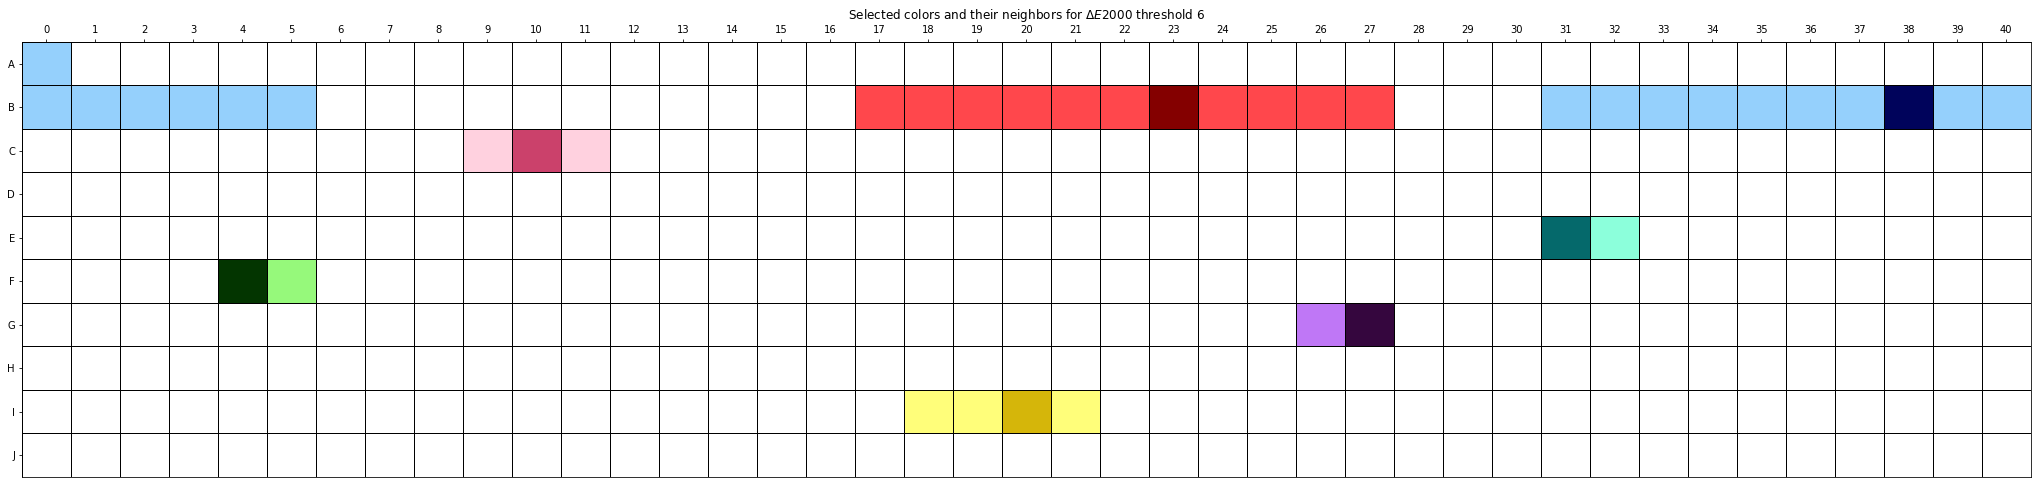

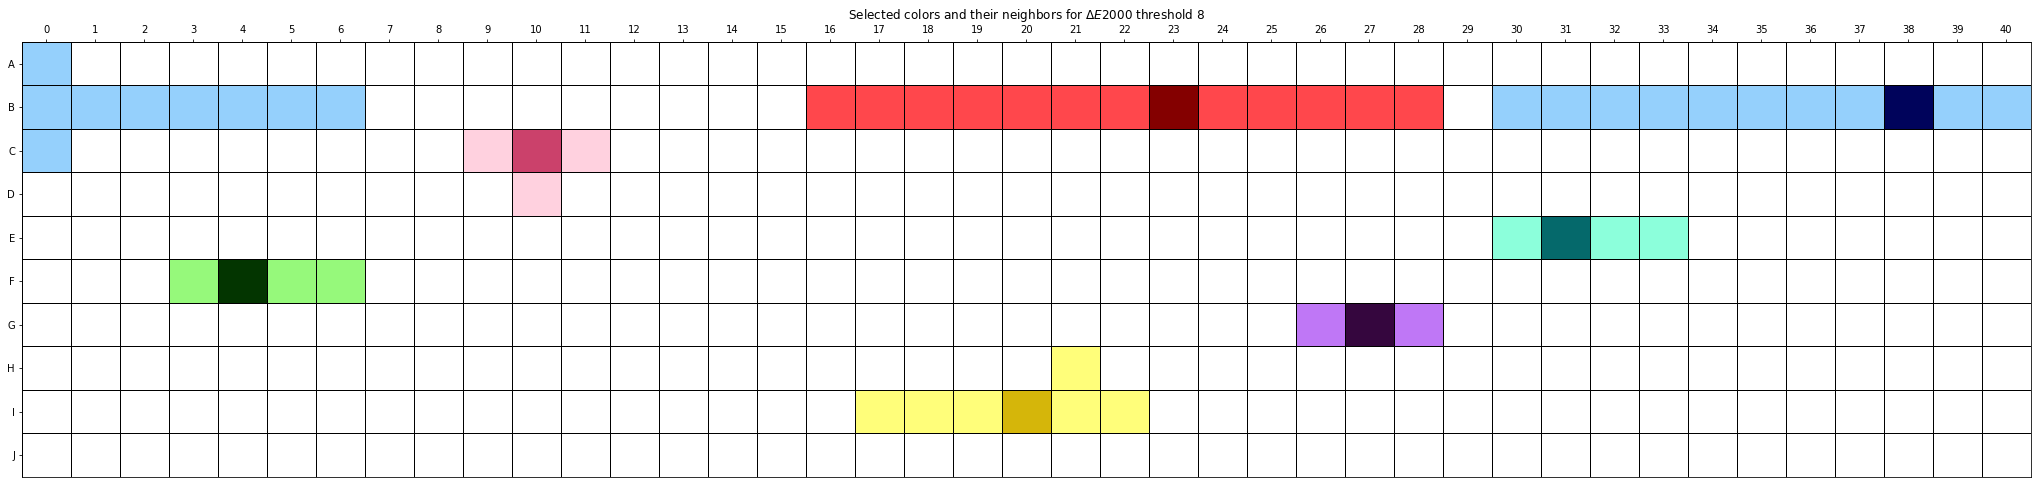

In [15]:
threshes = [1, 2, 4,5, 6, 8]
grid_pts = [('B', 23), ('B', 38), ('I', 20), ('F', 4), ('G', 27), ('C', 10), ('E', 31)]
chips = [wcs.wcsgrid_to_chipnum[g] for g in grid_pts]
    
for thresh in threshes:
    adjacencies = wcs.build_adjacency_dict(distances, thresh)
    adjs = {}
    for c in chips:
        adjs[c] = adjacencies[c].copy()
    # take a subset of the adjacencies dict
    plot_grid_with_neighbors(adjs, thresh)